In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

pd.set_option('display.max_columns',30)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [110]:
pd.set_option('display.max_columns',None)

In [111]:
data = pd.read_csv(r'marketing.csv')
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response,result
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure,yes
12866,17259,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,93,2,failure,yes
12867,15200,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,172,2,failure,no
12868,13775,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,-1,0,unknown,no


In [112]:
data.describe(include='all')

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response,result
count,12870.0000,12870.0000,12870,12870,12870,12870,12870.0000,12870,12870,12870,12870.0000,12870,12870.0000,12870.0000,12870.0000,12870,12870
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,4,2
top,NaN,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,2858,7490,6368,12662,NaN,6605,11060,8756,NaN,3594,NaN,NaN,NaN,10070,8903
mean,16434.5000,41.0911,NaN,NaN,NaN,NaN,1483.7744,NaN,NaN,NaN,15.6411,NaN,2.6591,45.5555,0.6890,NaN,NaN
std,3715.3933,11.3056,NaN,NaN,NaN,NaN,3311.0552,NaN,NaN,NaN,8.3690,NaN,2.8635,104.4494,2.0497,NaN,NaN
min,10000.0000,18.0000,NaN,NaN,NaN,NaN,-6847.0000,NaN,NaN,NaN,1.0000,NaN,1.0000,-1.0000,0.0000,NaN,NaN
25%,13217.2500,32.0000,NaN,NaN,NaN,NaN,102.0000,NaN,NaN,NaN,8.0000,NaN,1.0000,-1.0000,0.0000,NaN,NaN
50%,16434.5000,39.0000,NaN,NaN,NaN,NaN,515.0000,NaN,NaN,NaN,16.0000,NaN,2.0000,-1.0000,0.0000,NaN,NaN
75%,19651.7500,49.0000,NaN,NaN,NaN,NaN,1591.7500,NaN,NaN,NaN,21.0000,NaN,3.0000,-1.0000,0.0000,NaN,NaN


In [113]:
data.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
response     0
result       0
dtype: int64

In [114]:
data['result'] = data['result'].map({'yes':0, 'no':1})
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response,result
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,1
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,1
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,1
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,1
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure,0
12866,17259,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,93,2,failure,0
12867,15200,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,172,2,failure,1
12868,13775,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,-1,0,unknown,1


In [115]:
data.pdays.value_counts()

-1      10067
 182       76
 92        75
 91        65
 181       63
        ...  
 440        1
 804        1
 434        1
 437        1
 427        1
Name: pdays, Length: 461, dtype: int64

In [116]:
data.previous.value_counts()

0     10067
1       921
2       692
3       391
4       248
5       182
6       109
7        60
8        54
9        28
10       28
12       20
11       18
13       11
14        6
17        6
16        4
15        4
20        4
19        2
21        2
23        2
29        2
30        2
18        2
26        1
37        1
22        1
58        1
55        1
Name: previous, dtype: int64

In [117]:
#data = data.drop(['ID'], axis=1)
data = data.drop(['pdays','previous','ID'], axis=1)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,response,result
0,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,unknown,1
1,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,unknown,1
2,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,unknown,1
3,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,unknown,1
4,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,failure,0
12866,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,failure,0
12867,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,failure,1
12868,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,unknown,1


In [118]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
campaign      int64
response     object
result        int64
dtype: object

In [119]:
data = pd.get_dummies(data, drop_first=True)

data

,age,balance,day,campaign,result,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,response_other,response_success,response_unknown
0,29,18254,11,2,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,26,512,5,3,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,30,135,14,2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,41,30,10,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,27,321,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,47,1167,30,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12866,31,111,21,2,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
12867,37,1316,18,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
12868,42,479,28,2,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [120]:
data.isnull().sum()

age                    0
balance                0
day                    0
campaign               0
result                 0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
response_other         0
response_success       0
response_unknown       0


In [121]:
data.columns

Index(['age', 'balance', 'day', 'campaign', 'result', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'response_other', 'response_success',
       'response_unknown'],
      dtype='object')

In [122]:
inputs = data.drop('result',axis=1)
output = data['result']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size = 0.3, random_state = 42)

In [124]:
#Default model

In [125]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [126]:
from sklearn.metrics import precision_score, recall_score

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    precision = precision_score(y_test, y_pred)

    recall = recall_score(y_test, y_pred)

    
    print('Model Performance')

    print('Gini prob is', gini_prob*100)
    
    print('Precision is', precision)
    
    print('Recall is', recall)

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
base_model = RandomForestClassifier()
base_model.fit(X_train,y_train)

RandomForestClassifier()

In [129]:
base_mod_accuracy = evaluate(base_model,X_test,y_test)

Model Performance
Gini prob is 53.17331080607575
Precision is 0.8014299642508937
Recall is 0.914349276974416


In [130]:
importances = base_model.feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


feature_importance_df

,Feature,Importance
1,balance,0.1689
0,age,0.1553
2,day,0.1303
3,campaign,0.0681
37,response_success,0.0570
24,contact_unknown,0.0305
38,response_unknown,0.0292
21,housing_yes,0.0286
17,education_secondary,0.0188
15,marital_married,0.0183


In [131]:
k = 5

selected_features = feature_importance_df['Feature'][:k].tolist()

selected_features

['balance', 'age', 'day', 'campaign', 'response_success']

In [132]:
clfRF_selected = RandomForestClassifier()

clfRF_selected.fit(X_train[selected_features],y_train)

RandomForestClassifier()

In [133]:
result = evaluate(clfRF_selected, X_test[selected_features], y_test)
result

Model Performance
Gini prob is 34.3902541579227
Precision is 0.7680209698558322
Recall is 0.8691138301816833


In [134]:
#Optimized model

In [135]:
from sklearn.model_selection import RandomizedSearchCV

In [136]:
# Modified ranges for RandomizedSearchCV
random_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_features': ['auto', 'sqrt',],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [137]:
base_model_random = RandomizedSearchCV(estimator = base_model, param_distributions = random_grid, n_iter = 100, cv = 3, random_state=42, n_jobs = -1)

base_model_random.fit(X_train,y_train)

/Users/personal_mac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
141 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
109 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/personal_mac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal_mac/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/personal_mac/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_paramet

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   random_state=42)

In [138]:
base_model_random.best_params_

{'n_estimators': 250,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [139]:
optimized_model = base_model_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)

Model Performance
Gini prob is 55.69291066693678
Precision is 0.798284625158831
Recall is 0.9317760474601409


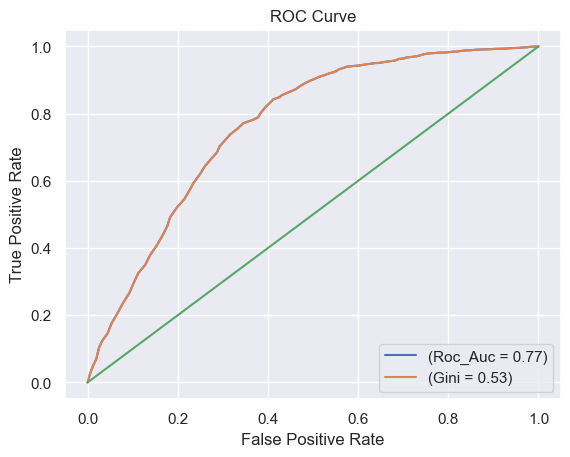

In [140]:
y_prob = base_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

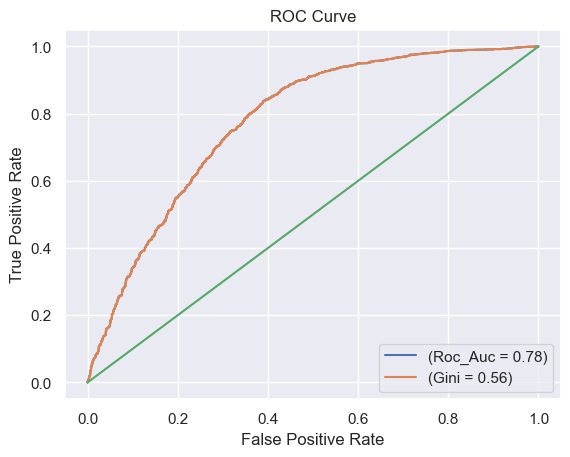

In [141]:
y_prob = optimized_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

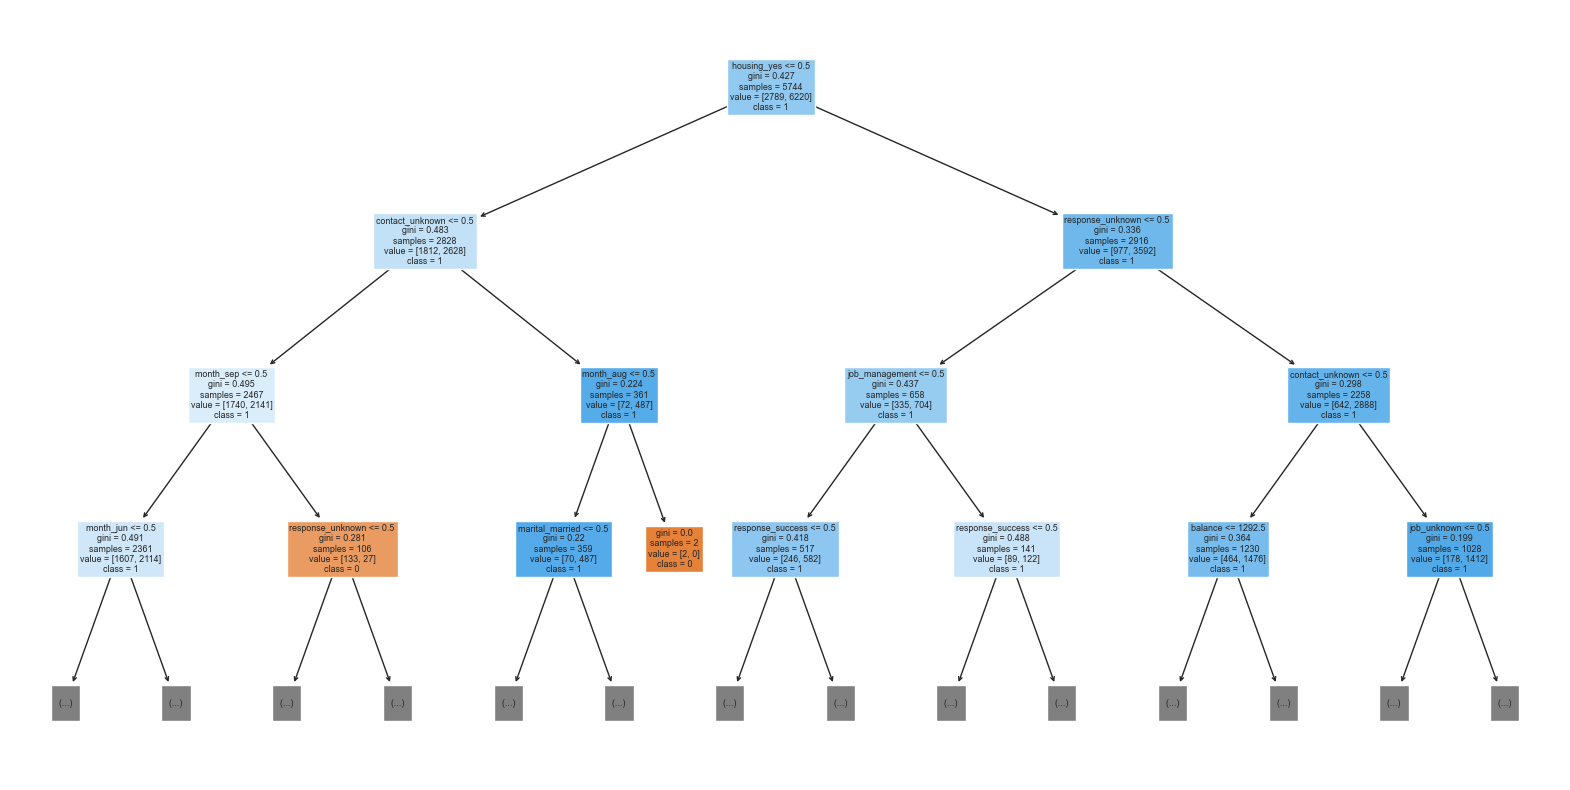

In [142]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))

features = list(X_train.columns)

class_names = [str(class_label) for class_label in optimized_model.classes_]

plot_tree(optimized_model.estimators_[9], feature_names=features, class_names=class_names, filled=True, max_depth=3)

plt.show()


In [143]:
variables = []
train_gini_scores = []
test_gini_scores = []


for i in X_train.columns:
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]

    
    optimized_model.fit(X_train_single_var, y_train)
    
    y_pred_train_single_var = optimized_model.predict_proba(X_train_single_var)[:, 1]

    train_roc = roc_auc_score(y_train, y_pred_train_single_var)
    train_gini = 2 * train_roc - 1

    
    y_pred_test_single_var = optimized_model.predict_proba(X_test_single_var)[:, 1]

    test_roc = roc_auc_score(y_test, y_pred_test_single_var)
    test_gini = 2 * test_roc - 1


    variables.append(i)
    train_gini_scores.append(train_gini)
    test_gini_scores.append(test_gini)


results_df = pd.DataFrame({
                            'Variable': variables,
                            'Train Gini': train_gini_scores,
                            'Test Gini': test_gini_scores
                        })

results_df_sorted = results_df.sort_values(by='Test Gini', ascending=False)

pd.options.display.float_format = '{:.4f}'.format

results_df_sorted


,Variable,Train Gini,Test Gini
38,response_unknown,0.1988,0.2262
24,contact_unknown,0.2128,0.2105
21,housing_yes,0.2121,0.2026
2,day,0.1909,0.1809
37,response_success,0.1623,0.1787
1,balance,0.6220,0.1663
0,age,0.2241,0.1632
32,month_may,0.1528,0.1506
3,campaign,0.1481,0.1430
16,marital_single,0.0861,0.0910


In [144]:
inputs = data[['response_unknown','contact_unknown','housing_yes','day','response_success', 'month_may', 'campaign']]
output = data['result']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size = 0.3, random_state = 42)

In [146]:
base_model_random.fit(X_train,y_train)

/Users/personal_mac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
141 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/personal_mac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal_mac/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/personal_mac/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_paramet

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   random_state=42)

In [147]:
optimized_model = base_model_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)

Model Performance
Gini prob is 48.72035493172382
Precision is 0.7691837358605931
Recall is 0.9328883945124212


# Deployment

In [153]:
import pandas as pd

test = pd.read_excel(r'marketing_test.xlsx')

test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response
0,812,25,blue-collar,single,secondary,no,764,yes,no,cellular,18,may,1,-1,0,unknown
1,71,40,blue-collar,single,primary,no,118,no,no,unknown,23,feb,1,-1,0,unknown
2,912,27,admin.,divorced,secondary,no,451,yes,no,cellular,16,jul,1,-1,0,unknown
3,43,30,services,single,secondary,no,495,yes,no,cellular,21,nov,1,-1,0,unknown
4,431,36,blue-collar,married,primary,no,1548,yes,yes,cellular,18,may,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,49,43,blue-collar,married,secondary,no,413,yes,no,cellular,12,aug,2,182,4,success
853,409,56,management,married,tertiary,no,1282,no,no,cellular,19,aug,4,-1,0,unknown
854,105,54,admin.,married,primary,no,976,yes,no,unknown,3,jun,3,-1,0,unknown
855,810,30,unemployed,single,tertiary,no,1159,no,no,telephone,5,jun,1,-1,0,unknown


In [154]:
inputs.columns

Index(['response_unknown', 'contact_unknown', 'housing_yes', 'day',
       'response_success', 'month_may', 'campaign'],
      dtype='object')

In [155]:
test = test[['ID','campaign','day','month', 'housing', 'contact', 'response']]

test

,ID,campaign,day,month,housing,contact,response
0,812,1,18,may,yes,cellular,unknown
1,71,1,23,feb,no,unknown,unknown
2,912,1,16,jul,yes,cellular,unknown
3,43,1,21,nov,yes,cellular,unknown
4,431,2,18,may,yes,cellular,unknown
...,...,...,...,...,...,...,...
852,49,2,12,aug,yes,cellular,success
853,409,4,19,aug,no,cellular,unknown
854,105,3,3,jun,yes,unknown,unknown
855,810,1,5,jun,no,telephone,unknown


In [156]:
test = pd.get_dummies(test, drop_first=True)
test

,ID,campaign,day,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,housing_yes,contact_telephone,contact_unknown,response_other,response_success,response_unknown
0,812,1,18,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,71,1,23,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,912,1,16,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,43,1,21,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4,431,2,18,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,49,2,12,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
853,409,4,19,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
854,105,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
855,810,1,5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


In [157]:
test = test[['ID','response_unknown', 'contact_unknown', 'housing_yes', 'day',
       'response_success', 'month_may', 'campaign']]

test

,ID,response_unknown,contact_unknown,housing_yes,day,response_success,month_may,campaign
0,812,1,0,1,18,0,1,1
1,71,1,1,0,23,0,0,1
2,912,1,0,1,16,0,0,1
3,43,1,0,1,21,0,0,1
4,431,1,0,1,18,0,1,2
...,...,...,...,...,...,...,...,...
852,49,0,0,1,12,1,0,2
853,409,1,0,0,19,0,0,4
854,105,1,1,1,3,0,0,3
855,810,1,0,0,5,0,0,1


In [158]:
test['prob_interest'] = optimized_model.predict_proba(test.iloc[:,1:])[:,1]
test

/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_40325/2869525109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prob_interest'] = optimized_model.predict_proba(test.iloc[:,1:])[:,1]


,ID,response_unknown,contact_unknown,housing_yes,day,response_success,month_may,campaign,prob_interest
0,812,1,0,1,18,0,1,1,0.7455
1,71,1,1,0,23,0,0,1,0.7951
2,912,1,0,1,16,0,0,1,0.6974
3,43,1,0,1,21,0,0,1,0.7552
4,431,1,0,1,18,0,1,2,0.7622
...,...,...,...,...,...,...,...,...,...
852,49,0,0,1,12,1,0,2,0.1452
853,409,1,0,0,19,0,0,4,0.7877
854,105,1,1,1,3,0,0,3,0.8007
855,810,1,0,0,5,0,0,1,0.5283
